# Сборный проект - 1

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Доступны данные до 2016 года и на основании данных необходимо спланировать кампанию на 2017-й. Также необходимо отработать принцип работы с данными. Неважно, будет это прогноз продаж на 2017 год по данным 2016-го или же на 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
#Подключим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#Прочитаем файл
games = pd.read_csv('/datasets/games.csv')
#Посмотрим первые 5 строк таблицы
print('Таблица games:')
display(games.head(5))
#Просмотрим общую информации о таблице
print('\n Общая информация таблицы games: \n')
games.info()

Таблица games:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



 Общая информация таблицы games: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Вывод

Таблица содержит 1615 строк и 11 столбцов.В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating  содержаться пропуски, которые требуется обработать. Также в столбце Year_of_Release (год релиза) данные заполнены в некорректном виде. Столбцы Year_of_Release и User_Score представленны в не правильном формате.

# Шаг 2. Подготовка данных

1. Приведем названия столбцов и данные столбцах 'name', 'platform', 'genre', 'rating' к нижнему регистру

In [2]:
#Заменим названия столбцов (приведитем к нижнему регистру)
games.columns = games.columns.str.lower()

#Данныев столбцах 'name', 'platform', 'genre' привидем к нижнему регистру.  
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2. Преобразуем столбец с годом релиза из формата float64 в формат int и заменим пропуски на нулевые значения

In [3]:
#Преобразуем столбец с годом выпуска из формата float64 в формат int. 

#Сначала посмотрим уникальные значения
display(games['year_of_release'].unique())
#Заменим пропуски на нулевые значения
games['year_of_release'] = games['year_of_release'].fillna(0)
#Преобразуем столбцы с годом выпуска из формата float64 в формат int. 
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()
#Отобразим количество уникальных значенийй
display(games['year_of_release'].sort_values(ascending = False).value_counts())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

3. Заменим пропуски на нули в столбцах 'user_score', 'critic_score'.

In [4]:
#Заменим пропуски на нули в столбцах 'user_score', 'critic_score'.
#Сначала посмотрим уникальные значения
display(games['user_score'].sort_values(ascending = False).value_counts())
display(games['user_score'].unique())
#Заменим пропуски на нули в столбцах 'user_score', 'critic_score'.
games['user_score'] = games['user_score'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)
#Посмотрим информацию о таблице после 
games.info()
display(games['user_score'].unique())
display(games['critic_score'].unique())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.6       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

4. Заполним пропуски в столбце года релиза игры

In [5]:
#Посмотрим на пропуски в столбце year_of_release
display(games['year_of_release'].sort_values(ascending = False).value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

5. Оценка пользователей содержит значения TBD, что означает To Be Determined. И служит для отметки неясностей или пропусков, которые надо заполнить. Заполним также пропуски в оценке критиков.

In [6]:
#Заменим значение tbd на 0
games['user_score'] = games['user_score'].replace('tbd',0)

#Заменим тип данных с object на float
games['user_score'] = games['user_score'].astype(float)

display(games['user_score'].sort_values(ascending = False).value_counts())

0.0    9126
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
9.6       2
1.9       2
1.3       2
0.9       2
9.7       1
Name: user_score, Length: 95, dtype: int64

6. Обработаем пропуски данных в столбце raiting.

In [7]:
#Заменим пропуски в столбце raiting, т.е заменим ноль на not
games['rating'] = games['rating'].fillna('not')
games['rating'].unique()

array(['e', 'not', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [8]:
#Напишем функцию, которая в случает отсутствия значения, а именно если значение равно not, тогда:
# жанру 'action', 'misc', shooter','platform', 'simulation' и 'fighting' присваивается рейтинг mature = 'm.
# жанру role-playing' и 'racing присваивается рейтинг teen = 't'
# жанру 'sport', 'adventure' и 'strategy' присваивается рейтинг everyone = 'e'
# жанру 'puzzle' присваивается рейтинг everyone_10_and_older = 'e10+'
mature = 'm'
teen = 't'
everyone_10_and_older = 'e10+'
everyone = 'e'
def rating_func(row):
    genre_f = row['genre']
    rating_f = row['rating']
    if rating_f == 'not':
        if (genre_f == 'action' or 'misc' or 'shooter' or 'platform' or 'simulation' or 'fighting'):
            return mature         
    if rating_f == 'not':
        if (genre_f == 'role-playing' or 'racing'):
            return teen    
    if rating_f == 'not':
        if (genre_f == 'sport' or 'adventure' or 'strategy'):
            return everyone
    if rating_f == 'not':
        if (genre_f == 'puzzle'):
            return everyone_10_and_older
    return rating_f

# Применим функцию к столбцу 'rating'
games['rating'] = games.apply(rating_func, axis=1)

#Посмотрим на результат
display(games['rating'].sort_values(ascending = False).value_counts())
games['rating'].unique()

m       8329
e       3990
t       2961
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: rating, dtype: int64

array(['e', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

7. Удалим 2 нулевые строки, в которых отсутствует наименование игры и жанр

In [9]:
#Посмотрим информацию о таблице
print('Информация о таблице до удаления нулевых строк\n')
games.info()
games['genre'] = games['genre'].fillna('not')
genre_not = games.query('genre == "not"')
display(genre_not)
#Удалим 2 строки без названия игры и жанра
games = games[games['name'].notnull()]
print('\nИнформация о таблице после удаления нулевых строк\n')
games.info()


Информация о таблице до удаления нулевых строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,not,1.78,0.53,0.00,0.08,0.0,0.0,m
14244,NaN,gen,1993,not,0.00,0.00,0.03,0.00,0.0,0.0,m



Информация о таблице после удаления нулевых строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


8. Посчитаем суммарные продажи во всех регионах и запишишем их в отдельный столбец.

In [10]:
#Посчитаем суммарные продажи во всех регионах и запишишем их в отдельный столбец.

games['final_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,final_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,m,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,m,31.38


9. Проверим таблицу на дубликаты

In [11]:
#Проверим таблицу на дубликаты
print('Количество дубликатов в таблице:', games.duplicated().sum())

Количество дубликатов в таблице: 0


# Вывод:

В результает обработки данных были приведем названия столбцов к ннижнему регистру, а также данные столбцах 'name', 'platform', 'genre', 'rating' юыли прведены к нижнему регистру. Был преобразован столбец  с годом выпуска из формата float64 в формат int и заменены пропуски на нули в столбцах 'user_score', 'critic_score'. Пропуски в годе релиза игры, были заменены на медианные значения.Была написана функция для замены пропущенных значений user_score и critic_score. Также заменены пропуски в жанре игр, с помощью следующей логики: жанру 'action', 'misc', shooter','platform', 'simulation' и 'fighting' присваивается рейтинг mature = 'm, жанру role-playing' и 'racing присваивается рейтинг teen = 't', жанру 'sport', 'adventure' и 'strategy' присваивается рейтинг everyone = 'e', жанру 'puzzle' присваивается рейтинг everyone_10_and_older = 'e10+'. Были удалены 2 строчки с нулевыми названиями и таблица проверена на дубликаты. Дубликатов в таблице не оказалось. Посчитаны суммарные продажи во всех регионах и запишисаны в отдельный столбец.

# Шаг 3. Исследовательский анализ данных

1. Посчитаем количество игр выпушенные в разные годы и выберем актуальный период


Количеcтво игр по годам



2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

count      38.000000
mean      439.815789
std       446.367916
min         9.000000
25%        37.250000
50%       313.500000
75%       734.750000
max      1427.000000
Name: year_of_release, dtype: float64

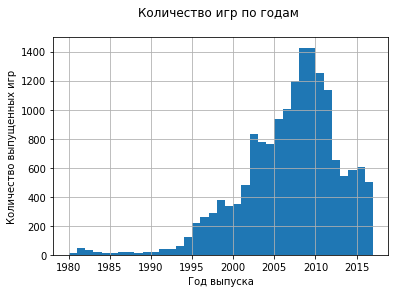

In [12]:
#Посчитаем количество игр выпушенные в разные годы и выберем актуальный период
#Построим гистограмму еоличества игр по годам.
games.hist('year_of_release', bins=37, range=(1980, 2017))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.title('Количество игр по годам \n')

#Выведем кол-во игр по годам в табличном формате
print('Количеcтво игр по годам\n')
value_games = games['year_of_release'].sort_values(ascending = False).value_counts()
display(value_games)

#Выведем числовые показатели столбца кол-ва игр по годам
display(value_games.describe())

#Все что меньше 36 игр в год можно не считать, поэтому раcчеты можно вести начиная с 1993 года.


# Вывод

Все что меньше 36 игр в год можно не считать и такое количество игр было 1982, но анализирую данные 1991 было 41 игра, поэтому расчеты можно вести начиная с 1991 года.

2. Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим характерный срок за который появляются новые и исчезают старые платформы.

,platform,final_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


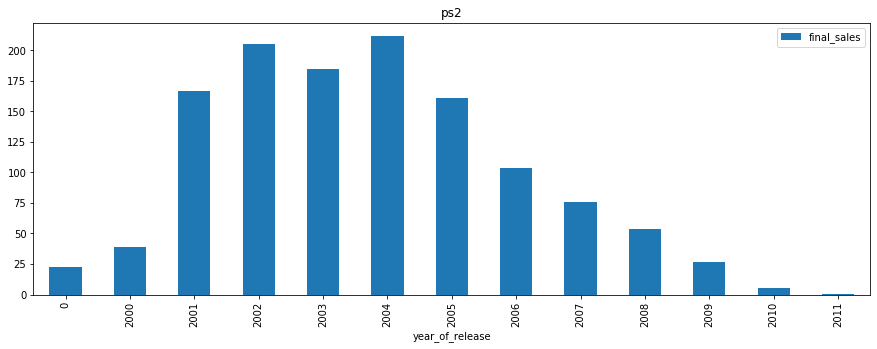

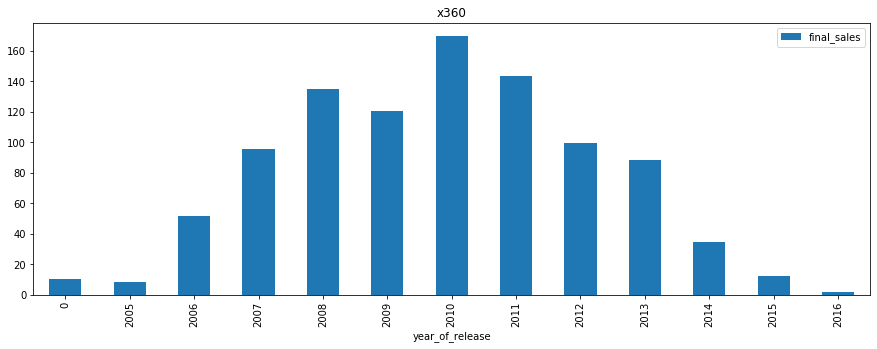

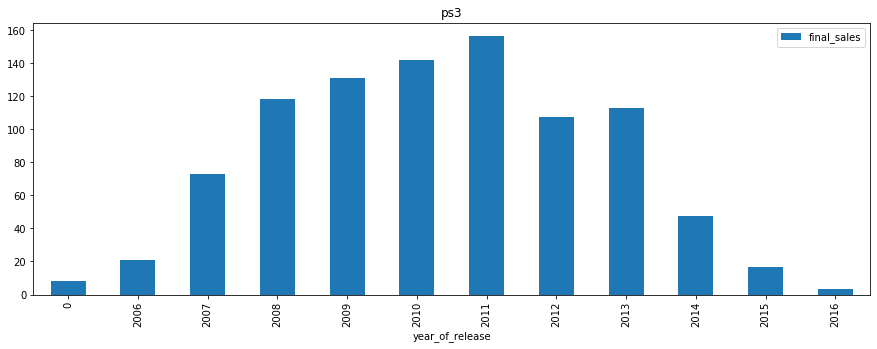

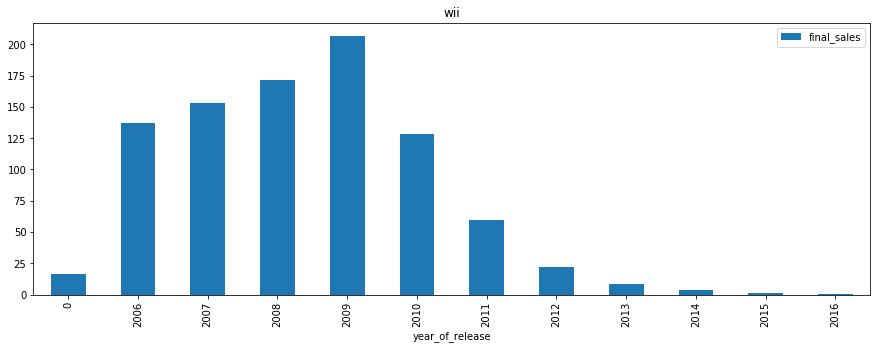

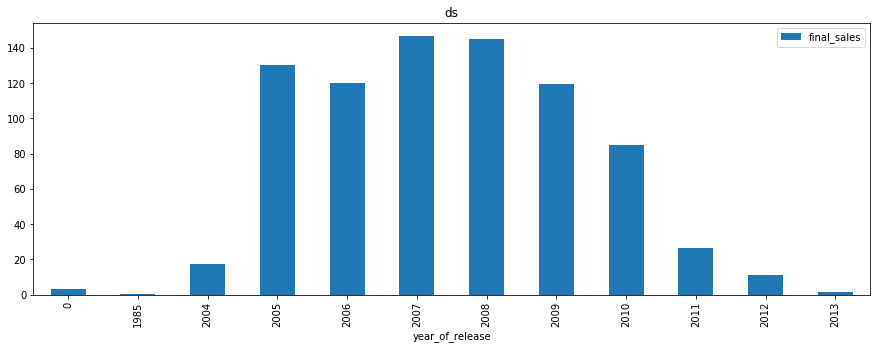

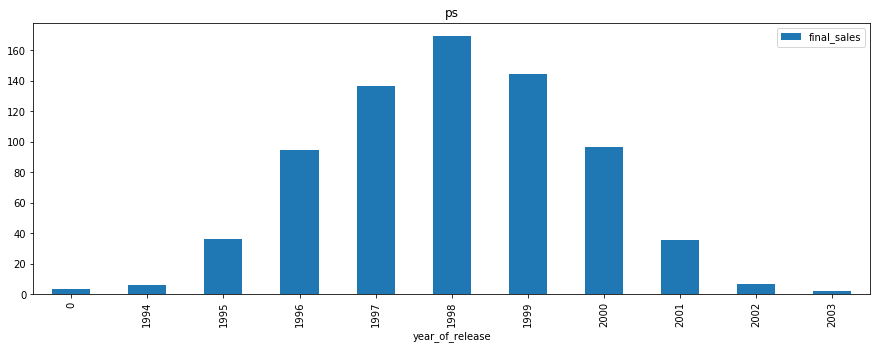

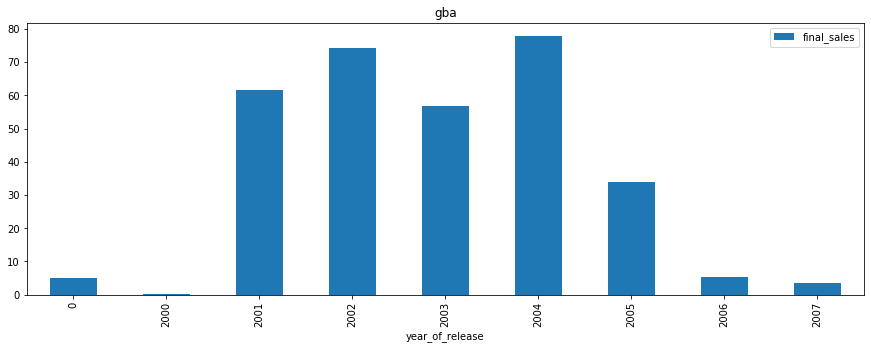

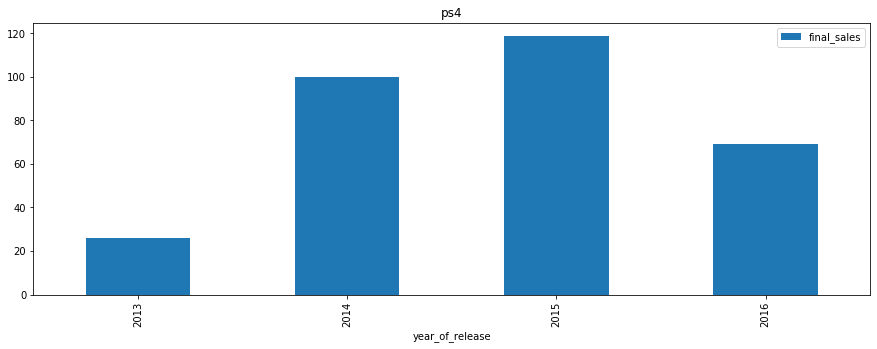

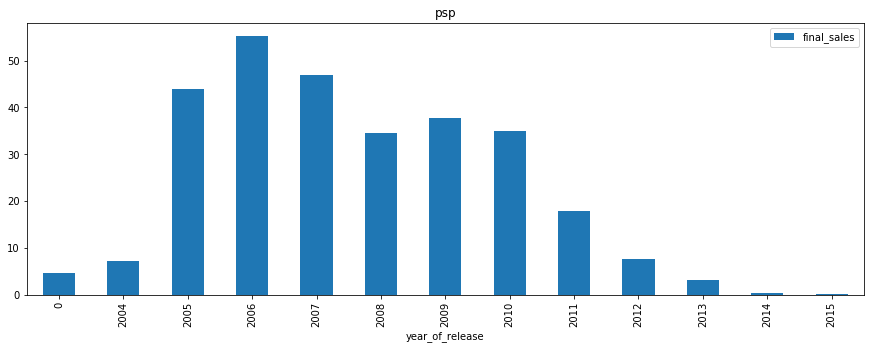

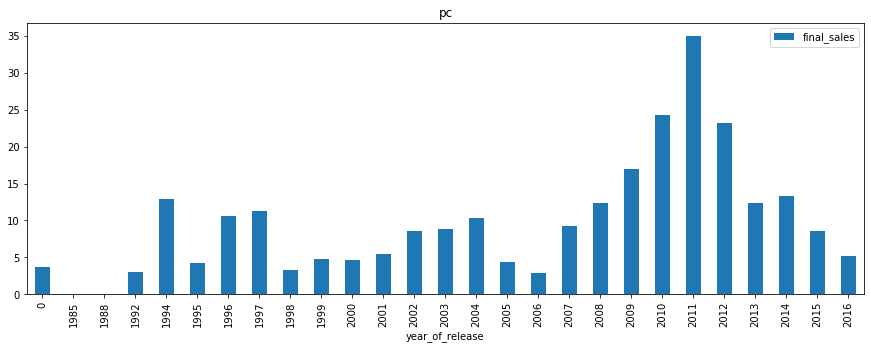

In [13]:
#Посчитаем суммарные продажи по платформам 
platform_sales = games.pivot_table(index = 'platform', values = 'final_sales', aggfunc = 'sum').sort_values(by = 'final_sales', ascending=False)

#Выведем ТОП-10 платформ
platform_sales = platform_sales.head(10).reset_index()
display(platform_sales)
top_platforms_dict = platform_sales['platform'].unique()

#Построим распределение по годам ТОП-10 платформ 
for platform in top_platforms_dict:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='final_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

# Вывод

Из полученных данных видно,  что актуальный срок жизни игры в среднем составляет 10 лет. Поэтому, чтобы сделать прогноз на 2017 год возьмем актуальный срок 2006 - 2016 год.

3. Сделаем срез данных исходя из актуального срока жизни игры

In [14]:
#Из графиков видно что актуальный срок жизни игры в среднем составляет 10лет. Поэтому, чтобы сделать прогноз на 2017 
#год возьмем актуальный срок 2006 - 2016 год. Для этого сделаем срез данных  2006 - 2016 год. 

games_2012_2017 = games.query('year_of_release >= 2012')
platform_sales_2012_2017 = games_2012_2017.pivot_table(index = 'platform', values = 'final_sales', aggfunc = 'sum').sort_values(by = 'final_sales', ascending=False)
display(platform_sales_2012_2017)

,final_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


# Вывод

Из полученных данных видно,  что актуальный срок жизни игры в среднем составляет 10 лет. Поэтому, чтобы сделать прогноз на 2017 год возьмем актуальный срок 2012 - 2016 год, чтобы не учитывать угасающие платформы с 2006 года.

4. Определим какие платформы лидируют по продажам и также определим растут или падают продажи. Выберим несколько потенциально прибыльных платформ.

,platform,final_sales
0,ps4,314.14
1,ps3,288.79
2,x360,236.54
3,3ds,194.61
4,xone,159.32
5,wiiu,82.19
6,pc,62.65
7,psv,49.18
8,wii,35.37
9,ds,12.55


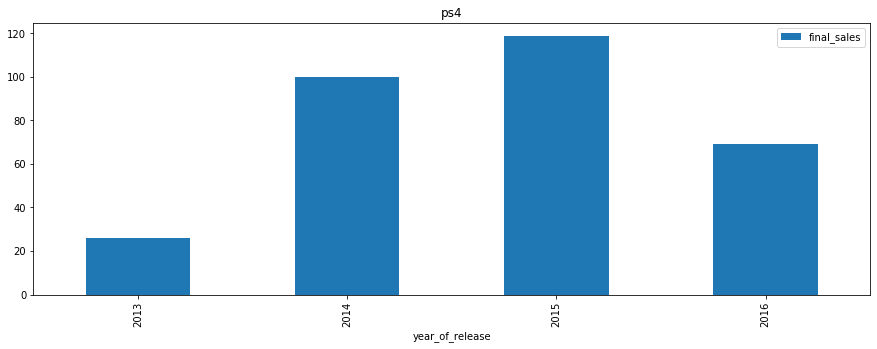

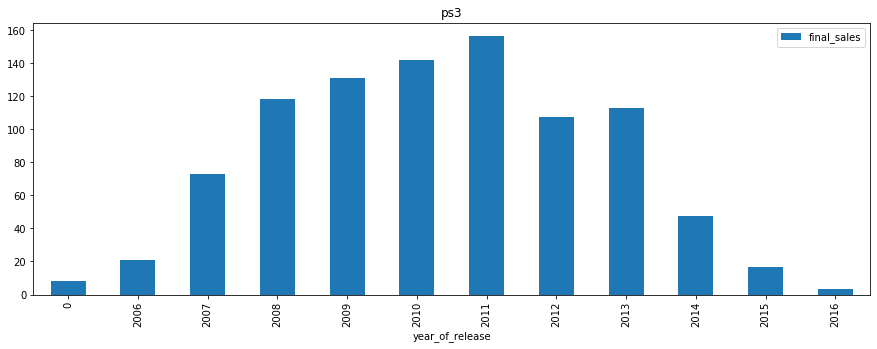

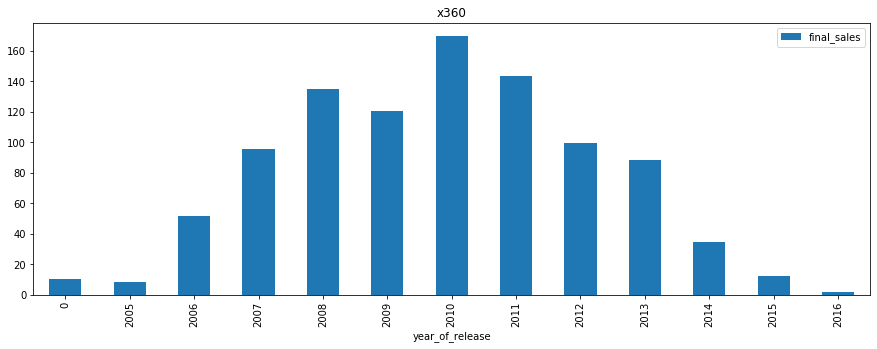

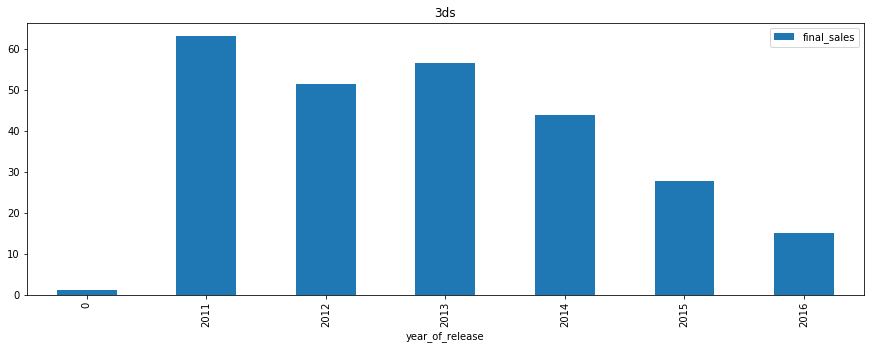

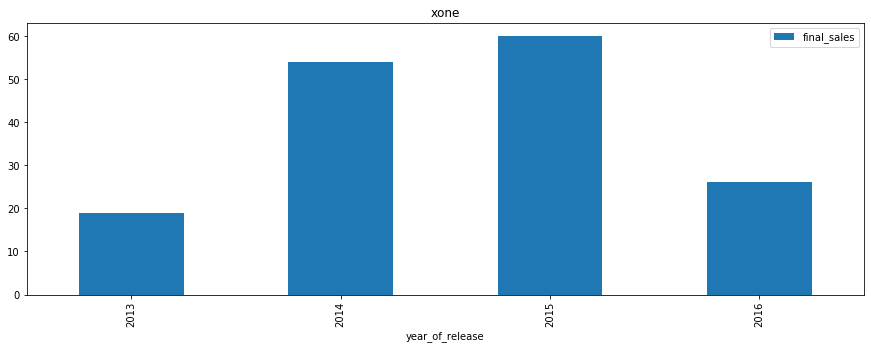

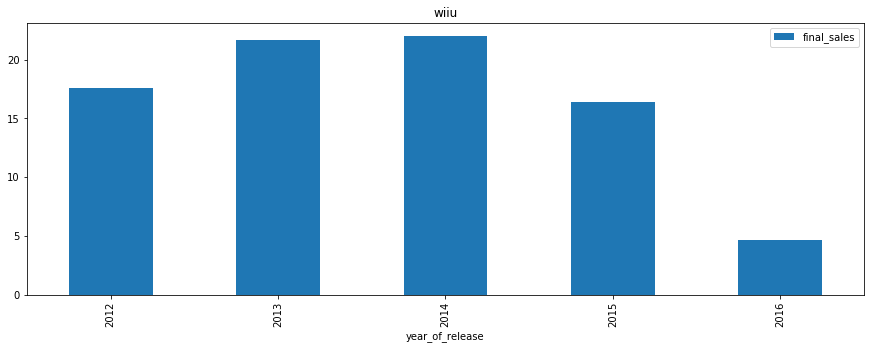

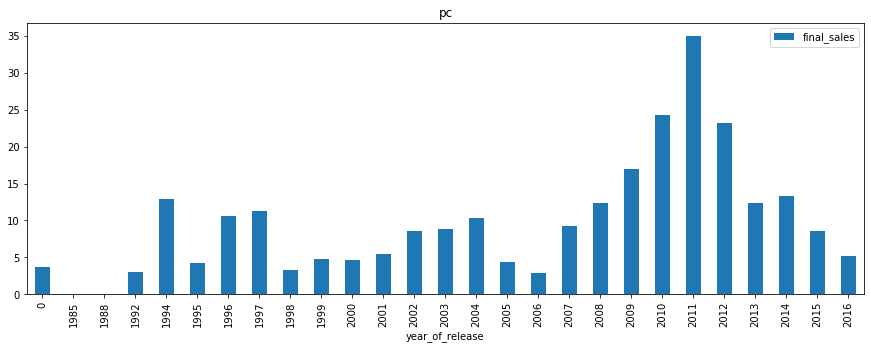

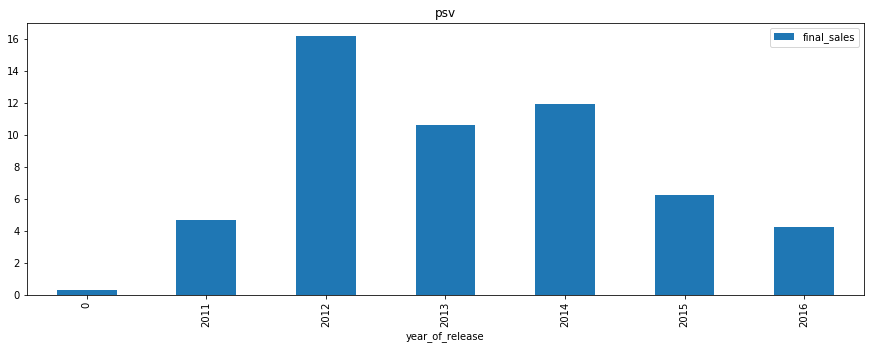

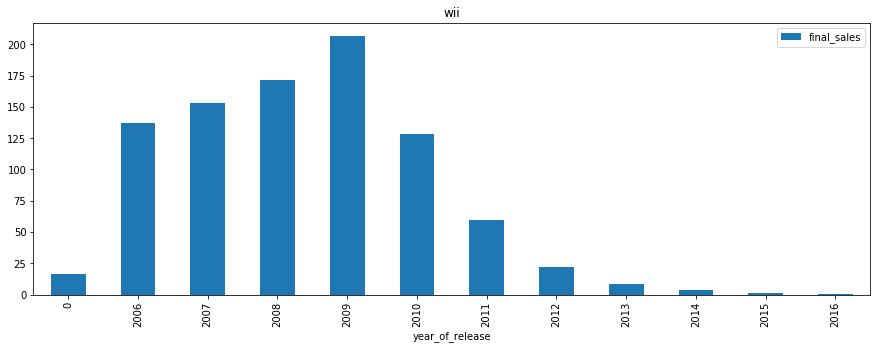

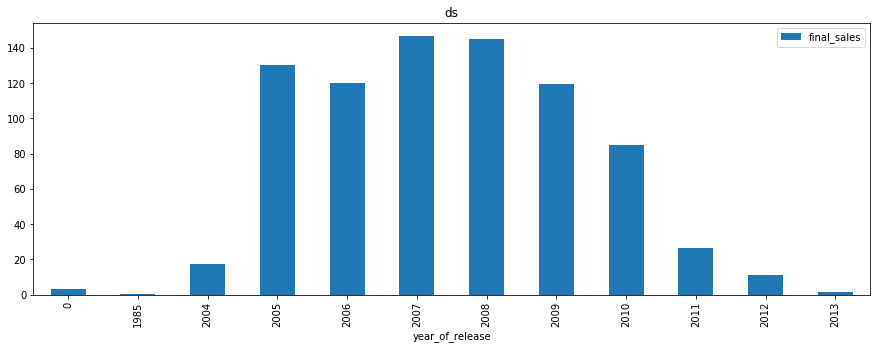

In [15]:
#Выведем ТОП-10 платформ лидирующих по продажам
platform_sales_top = platform_sales_2012_2017.head(10).reset_index()
display(platform_sales_top)

#Отобразим график продаж ТОП-10 платформ по годам
platform_sales_top_dict = platform_sales_top['platform'].unique()

for platform in platform_sales_top_dict:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='final_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

# Вывод 

По продажам лидируют PS4, PS3, X360, 3ds, Xone. По всем платформам продажи падают. Потенциально прибыльные платформы - это PS4 и Xone. Это 2 платформы, продажи которых в 2016 году были еще достаточно высокими.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Всё верно, что помимо общих продаж ты учитываешь актуальность на 2016 год.

</div>

5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

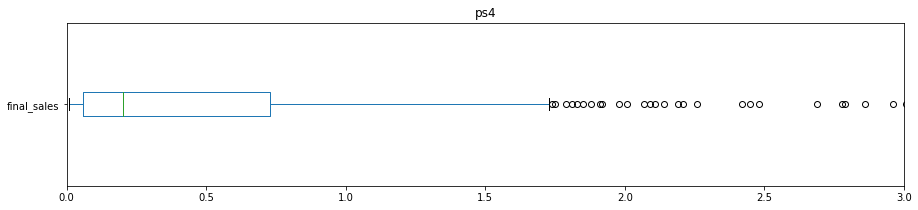

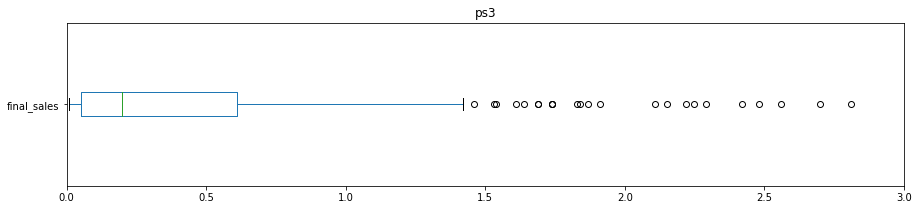

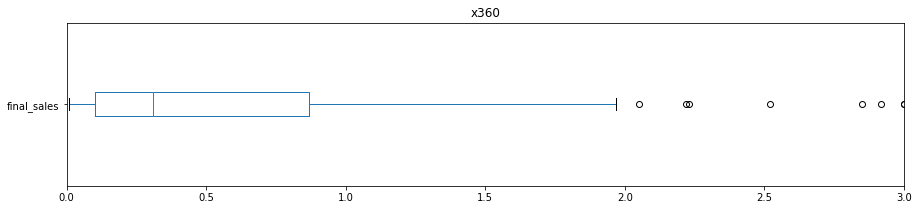

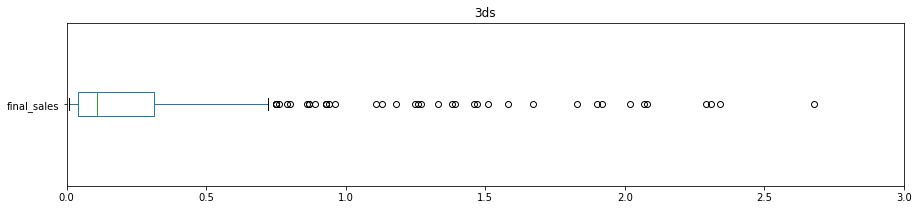

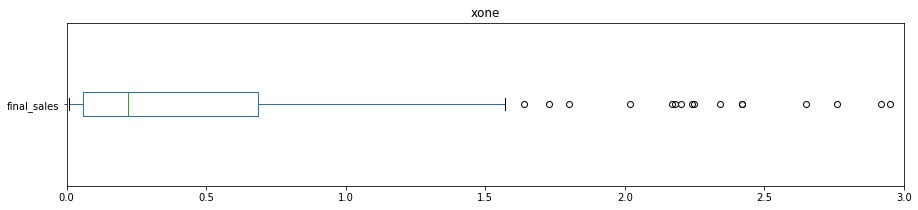

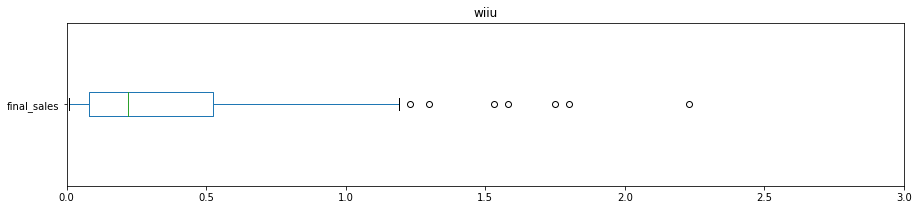

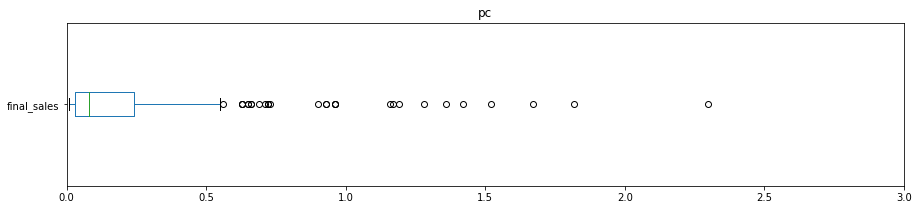

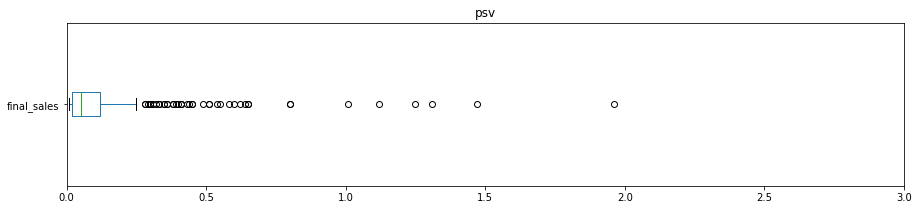

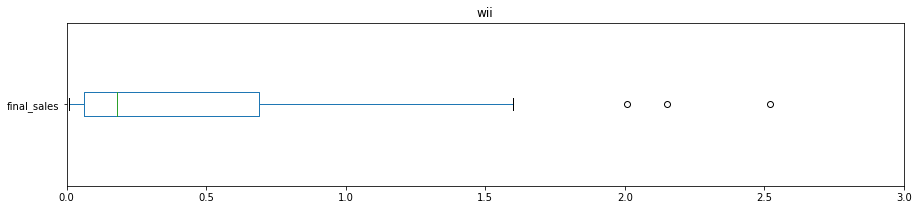

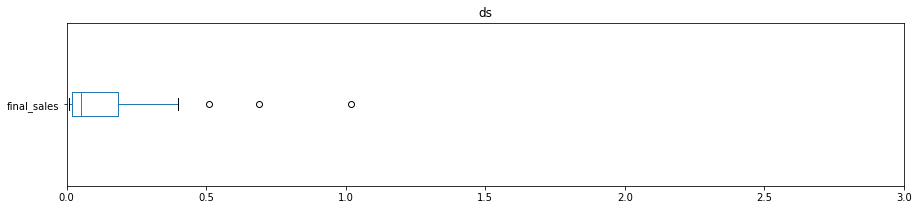

In [16]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

for platform in platform_sales_top_dict:
    games_2012_2017[games_2012_2017['platform'] == platform].plot(y='final_sales', kind='box', vert=False, figsize=(15,3))
    plt.xlim(0, 3) 
    plt.title(platform)

# Вывод

Очень много глобальных продаж лежат за пределами 'усов', таким образом считаются выбросами. Очень много выбросов у платформ PS3/PS4, Xone, PSV, 3DS, что означает что у этих платформ были хиты продаж. 

6. Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,final_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,m,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,0.0,0.0,m,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66


Значения корреляции для платформы PS4
Корреляция между продажами и отзывами пользователей 0.11311562450852881
Корреляция между продажами и отзывами критиков 0.2275496062775265

Значения корреляции для платформы Xbox One
Корреляция между продажами и отзывами пользователей 0.11656261405851895
Корреляция между продажами и отзывами критиков 0.2748391874944539

Значения корреляции для всех платформ
Корреляция между продажами и отзывами пользователей 0.18013055163556546
Корреляция между продажами и отзывами критиков 0.24862783028899083


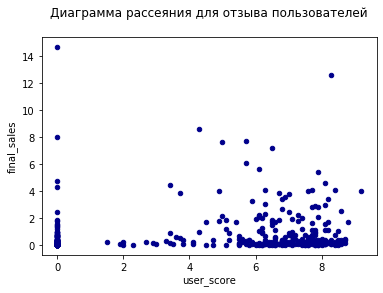

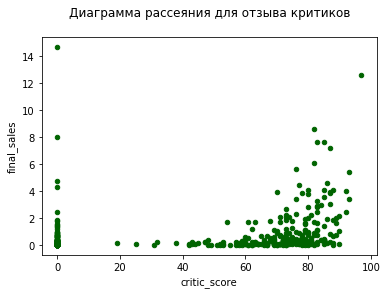

In [17]:
#Выберем популярнй платформой PS4, для этого сделаем срез данных по этой платформе
games_ps4 = games_2012_2017.query('platform == "ps4"')
display(games_ps4.head(5))

# Построим диагармму рассеяния для отзывов пользователей и для отзывов критиков
games_ps4.plot(x='user_score', y='final_sales', kind='scatter', color = 'DarkBlue', title='Диаграмма рассеяния для отзыва пользователей\n')
games_ps4.plot(x='critic_score', y='final_sales', kind='scatter', color = 'DarkGreen',  title='Диаграмма рассеяния для отзыва критиков\n')

#Посчитаем корреляцию для отзывов пользователей и для отзывов критиков для платформы PS4
print('Значения корреляции для платформы PS4')
print('Корреляция между продажами и отзывами пользователей', games_ps4['final_sales'].corr(games_ps4['user_score']))
print('Корреляция между продажами и отзывами критиков', games_ps4['final_sales'].corr(games_ps4['critic_score']))

#Посчитаем корреляцию для отзывов пользователей и для отзывов критиков для платформы Xbox one
games_xone = games_2012_2017.query('platform == "xone"')
print('\nЗначения корреляции для платформы Xbox One')
print('Корреляция между продажами и отзывами пользователей', games_xone['final_sales'].corr(games_xone['user_score']))
print('Корреляция между продажами и отзывами критиков', games_xone['final_sales'].corr(games_xone['critic_score']))

#Посчитаем корреляцию для отзывов пользователей и для отзывов критиков для всех платформ
print('\nЗначения корреляции для всех платформ')
print('Корреляция между продажами и отзывами пользователей', games_2012_2017['final_sales'].corr(games_2012_2017['user_score']))
print('Корреляция между продажами и отзывами критиков', games_2012_2017['final_sales'].corr(games_2012_2017['critic_score']))


# Вывод

Согласно полученным данным по рассчету корреляции для отдельных платформ и для всех платформ в совокупности, видно что зависимость продаж от отзывов критиков больше, чем зависимость продаж от отзывов пользователей. Из графиков видно, что продажи увеличиваются с увеличением рейтинга отзыва пользователей и критиков. Все описанное для конкретной платформы, относится и ко всем остальным платформам. 

7. Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры.

,final_sales
genre,
action,441.12
shooter,304.73
role-playing,192.80
sports,181.07
misc,85.04
platform,61.00
racing,53.50
fighting,44.49
simulation,35.12


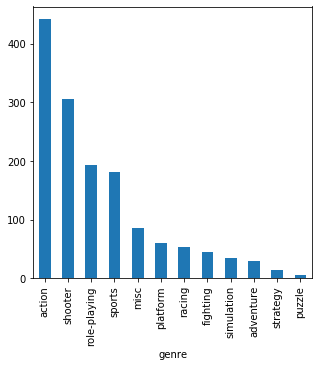

In [18]:
#Отобразим жанры по увывания в зависимости от количества продаж
genre_sales_2012_2017 = games_2012_2017.pivot_table(index = 'genre', values = 'final_sales', aggfunc = 'sum').sort_values(by = 'final_sales', ascending=False)
display(genre_sales_2012_2017)

# Отобразим данные в виде графика
genre_sales_2012_2017.plot(y='final_sales',kind='bar', legend = False, figsize = (5,5))

# Вывод:

Самые популярные жанры игр - это action, sports и shooter, игры этих жанров были всегда очень популярны. В вот самые не популярные - это strategy и puzzle. 

# Общий вывод:

Проанализирова данные получили, что актуальный срок жизни игры в среднем составляет 10 лет. Поэтому, чтобы сделать прогноз на 2017 год выделили актуальный срок 2006 - 2016 год и сделали такой же срез данных. Выяснили, что по продажам лидируют X360, PS3, Wii, ds, ps4, ps2 и по всем платформам продажи падают. Выьрали как потенциально прибыльные платформы - это PS4 и Xon, потому что продажи этих платформ были в 2016 году еще достаточно высокими.
Построили диаграмму "ящик с усами" и выяснили, что очень много глобальных продаж лежат за пределами "усов" и таким образом считаются выбросами.
Согласно полученным данным по рассчету корреляции для отдельных платформ и для всех платформ в совокупности, увидели что зависимость продаж от отзывов критиков больше, чем зависимость продаж от отзывов пользователей.А из графиков увидели, что продажи увеличиваются с увеличением рейтинга отзыва пользователей и критиков. И что все полученные данные для конкретной платформы, относятся и ко всем остальным платформам.
Нашли самые популярные жанры игр - это action, sports и shooter и что игры этих жанров были всегда очень популярны, а вот самые не популярные - это strategy и puzzle.

# Шаг 4. Составим портрет пользователя каждого региона

1. Найдем самые популярные платформы (топ-5) и опишим различия в долях продаж.

In [19]:
#Определим для пользователя каждого региона (NA, EU, JP) топ-5 платформ:
top5_platform_na = games_2012_2017.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Топ-5 платформ в регионе NA')
display(top5_platform_na.head(5))

top5_platform_eu = games_2012_2017.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('\nТоп-5 платформ в регионе EU')
display(top5_platform_eu.head(5))

top5_platform_jp = games_2012_2017.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('\nТоп-5 платформ в регионе JP')
display(top5_platform_jp.head(5))

Топ-5 платформ в регионе NA


,na_sales
platform,
x360,140.05
ps4,108.74
ps3,103.38
xone,93.12
3ds,55.31



Топ-5 платформ в регионе EU


,eu_sales
platform,
ps4,141.09
ps3,106.86
x360,74.52
xone,51.59
3ds,42.64



Топ-5 платформ в регионе JP


,jp_sales
platform,
3ds,87.79
ps3,35.29
psv,21.04
ps4,15.96
wiiu,13.01


# Вывод:

Самая популярная платформа в Северной Америке - это X360, так как сама платформа родом из США. В Евпропе популярны платформы Play Station 3/4 и X360, первая платформа из Японии, вторая из США. Так как в Европе нет собственной платформы, следовательно в равной степени популярны платформы из США и Японии. В Японии популярны только собственные платформы, такие как Nintendo 3DS и PS3. 

1. Найдем самые популярные жанры (топ-5)

In [20]:
#Определим для пользователя каждого региона (NA, EU, JP) топ-5 жанров:
top5_genre_na = games_2012_2017.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Топ-5 жанров в регионе NA')
display(top5_genre_na.head(5))

top5_genre_eu = games_2012_2017.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('\nТоп-5 жанров в регионе EU')
display(top5_genre_eu.head(5))

top5_genre_jp = games_2012_2017.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('\nТоп-5 жанров в регионе JP')
display(top5_genre_jp.head(5))

Топ-5 жанров в регионе NA


,na_sales
genre,
action,177.84
shooter,144.77
sports,81.53
role-playing,64.00
misc,38.19



Топ-5 жанров в регионе EU


,eu_sales
genre,
action,159.34
shooter,113.47
sports,69.09
role-playing,48.53
racing,27.29



Топ-5 жанров в регионе JP


,jp_sales
genre,
role-playing,65.44
action,52.80
misc,12.86
simulation,10.41
fighting,9.44


# Вывод:

Самые популярные жанры в Европе и Северной Америке - это action, sports и shooter, такие же как и во всем мире. А вот в Японцы верны традициям и самые популярный жанр у них role-playing.

3. Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [21]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?
esbr_rating_sale_na= games_2012_2017.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе NA')
display(esbr_rating_sale_na)

esbr_rating_sale_eu= games_2012_2017.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе EU')
display(esbr_rating_sale_eu)

esbr_rating_sale_jp= games_2012_2017.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе JP')
display(esbr_rating_sale_jp)


Зависимость продаж от рейтинга ESBR в регионе NA


,na_sales
rating,
m,334.88
e,114.37
e10+,75.70
t,66.02


Зависимость продаж от рейтинга ESBR в регионе EU


,eu_sales
rating,
m,285.46
e,113.03
e10+,55.37
t,52.96


Зависимость продаж от рейтинга ESBR в регионе JP


,jp_sales
rating,
m,130.04
e,28.33
t,26.02
e10+,8.19


# Вывод:

Согласно полученным данным рейтинг ESBR не влияет на продажи в отдельном регионе. Во всех регионах зависимость от рейтинга одинаковая.

# Общий вывод

Согласно полученным данным самая популярная платформа в Северной Америке - это X360, так как сама платформа родом из США. В Евпропе популярны платформы Play Station 3 и X360, первая платформа из Японии, вторая из США. Так как в Европе нет собственной платформы, следовательно в равной степени популярны платформы из США и Японии. В Японии популярны только собственные платформы, такие как Nintendo DS/3DS и PS3.
Что касается самых популярных жанров то в Европе и Северной Америке - это action, sports и shooter, такие же как и во всем мире. А вот в Японцы верны традициям и самые популярный жанр у них role-playing.

# Шаг 5. Проверка гипотез

1. Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [22]:
#Исключим пропуски из выборки
games_2012_2017_without_nan = games_2012_2017.query('user_score >0')

#Сделаем срез данных по платформе xone
xone_user = games_2012_2017_without_nan.query('platform =="xone"')
xone_user_rating = xone_user['user_score']

#Сделаем срез данных по платформе PC
pc_user = games_2012_2017_without_nan.query('platform =="pc"')
pc_user_rating = pc_user['user_score']

#Найдем дисперсию двух срезов данных:
variance_xone =  np.var(xone_user['user_score'], ddof=1)
print('Дисперсия рейтинга платформы Xone:', variance_xone)

variance_pc =  np.var(pc_user['user_score'], ddof=1)
print('Дисперсия рейтинга платформы PC:', variance_pc)

print('\nОтношение дисперсий:', variance_xone / variance_pc)

Дисперсия рейтинга платформы Xone: 1.9069968429360695
Дисперсия рейтинга платформы PC: 2.770443997158418

Отношение дисперсий: 0.6883361818149125


2. В связи с тем, что дисперсии отличаются более чем на 5%, то при проверки гипотезы параметр equal_var установим как False, так как по умолчанию он задан как equal_var = True 

In [23]:
#Зададим критический уровень статистической значимости
alpha = .05 
#Проверим гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var = False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


# Вывод

Для проверки гипотизы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, выберим гипотезу о равенстве средних двух генеральных совокупностей. Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это пользовательские рейтинги платформы Xbox, вторая - пользовательские рейтинги платформы PC. Сформулиуем нулевую гипотезу (Н0) так, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средние пользовательские рейтинги платформ Xbox One не равны средним пользовательским рейтингам платформы PC. В результате получаем, что нулевая гипотеза не отвергается и это означает, что средний пользовательский рейтинг платформы Xbox One равнен среднему пользовательскому рейтингу платформы PC.

3. Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

In [24]:
#Сделаем срез данных по жанру action из среза данных без пропусков
action_user = games_2012_2017_without_nan.query('genre =="action"')
action_user_rating = action_user['user_score']

#Сделаем срез данных по жанру sports
sports_user = games_2012_2017_without_nan.query('genre =="sports"')
sports_user_rating = sports_user['user_score']

#Найдем дисперсию двух срезов данных:
variance_action =  np.var(action_user['user_score'], ddof=1)
print('Дисперсия рейтинга жанра Action:', variance_action)

variance_sports =  np.var(sports_user['user_score'], ddof=1)
print('Дисперсия рейтинга жанра Sports:', variance_sports)

print('\nОтношение дисперсий:', variance_action / variance_sports)

Дисперсия рейтинга жанра Action: 1.8890840494348111
Дисперсия рейтинга жанра Sports: 3.022890298704732

Отношение дисперсий: 0.6249264322440872


4. В связи с тем, что дисперсии отличаются более чем на 5%, то при проверки гипотезы параметр equal_var установим как False, так как по умолчанию он задан как equal_var = True 

In [25]:
#Зададим критический уровень статистической значимости
alpha = .05 

#Проверим гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


# Вывод

Для проверки гипотизы, что  средние пользовательские рейтинги жанров Action и Sports разные, выберим гипотезу о равенстве средних двух генеральных совокупностей. Выберим эту гипотезу, так как у нас две генеральные совокупности, одна совокупность - это пользовательские рейтинги жанра Action, вторая - пользовательские рейтинги жанра PC. Сформулиуем нулевую гипотезу (Н0) так, что средние пользовательские рейтинги платформ рейтинги жанров Action и Sports одинаковые. Тогда альтернативная гипотиза (Н1) будет сформулирована, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. В результате получаем, что нулевая гипотеза отвергается и это означает, что гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные потверждается. 

# Общий вывод:

Для проверки обоих гипотез был выбрана гипотеза о равенстве средних двух генеральных совокупностей. Выберали эту гипотезу, так как у нас и в первом и втором случае имеются две генеральные совокупности. В результате получили, что гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергается. А гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные - потвердилась.

# Общий вывод к проекту:

Согласно полученным данным, делаем вывод, чтобы успешно продавать игры в 2017 году, то необходимо следовать следующим тенденциям. Необходимо обращать внимание на жанр игры. Так для Японии лучше продвать игры жанра role-playing, а для Северной Америке и Европы продавать игры жанров - action, sports и shooter. Также необходимо ориентироваться на платформы. Для Северной Америке - это платформа Xbox 360 и платформа Xbox one, для Европы - это Xbox 360/one и PS3/4 и для Японии - это Nintendo DS/3DS и PS3/4. Конечно же самые перспективные платформы для продаж игр на 2017 год являются Xbox one и PS4, так как они имели самые высокие показатели по продажам для них игр в 2016 году. 